In [86]:
import numpy as np
import pandas as pd
import main
import seaborn as sns
data_for_analize = pd.read_csv(main.data_dir + '\\data_for_analize.csv', delimiter=';')
data_for_analize.head()

,UWI,aps,kgl,kng,kno,kp,kpr,rp,satur,well_name,date_start,wc,X-Coord,Y-Coord
0,314_342,0.319774,0.191458,0.011972,0.198922,0.140632,14.748285,22.101278,0.572847,554,01.06.2008,0.08,351657.56,6464689.29
1,314_324,0.264904,0.244417,0.018095,0.133657,0.105540,2.611139,20.567642,0.448780,536,01.08.2009,0.26,352508.25,6467277.77
2,314_320,0.281761,0.245280,0.020753,0.124402,0.109546,5.799174,26.632422,0.430462,532,01.01.2010,0.30,352508.25,6467304.77
3,314_351,0.247471,0.245818,0.014420,0.079725,0.109022,1.026685,18.856713,0.357296,563,01.06.2010,0.33,349963.39,6464172.47
4,314_381,0.310374,0.220985,0.027579,0.161093,0.124150,8.885479,17.567248,0.570705,593,01.04.2010,0.25,351543.76,6464555.85


In [87]:
%matplotlib inline
import matplotlib.pyplot as plt

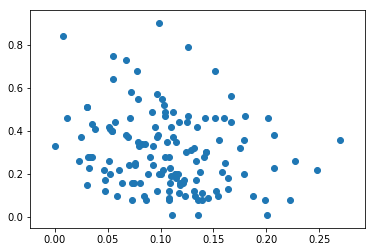

In [88]:
# зависимость обводненности от нефтенасыщенности 
x_coord = data_for_analize['kno']
y_coord = data_for_analize['wc']
plt.scatter(x_coord, y_coord)

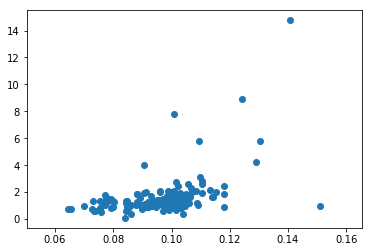

In [89]:
# зависимость пористости от проницаемости 
x_coord = data_for_analize['kp']
y_coord = data_for_analize['kpr']
plt.scatter(x_coord, y_coord)

In [90]:
y = data_for_analize['wc']
# y_r = int(10) * round(y,1)
y_r = []
for val in y:
    y_r.append(int(10*val))

In [91]:
data_for_analize_scale = data_for_analize.copy() 
data_for_analize_scale['wc']=y_r

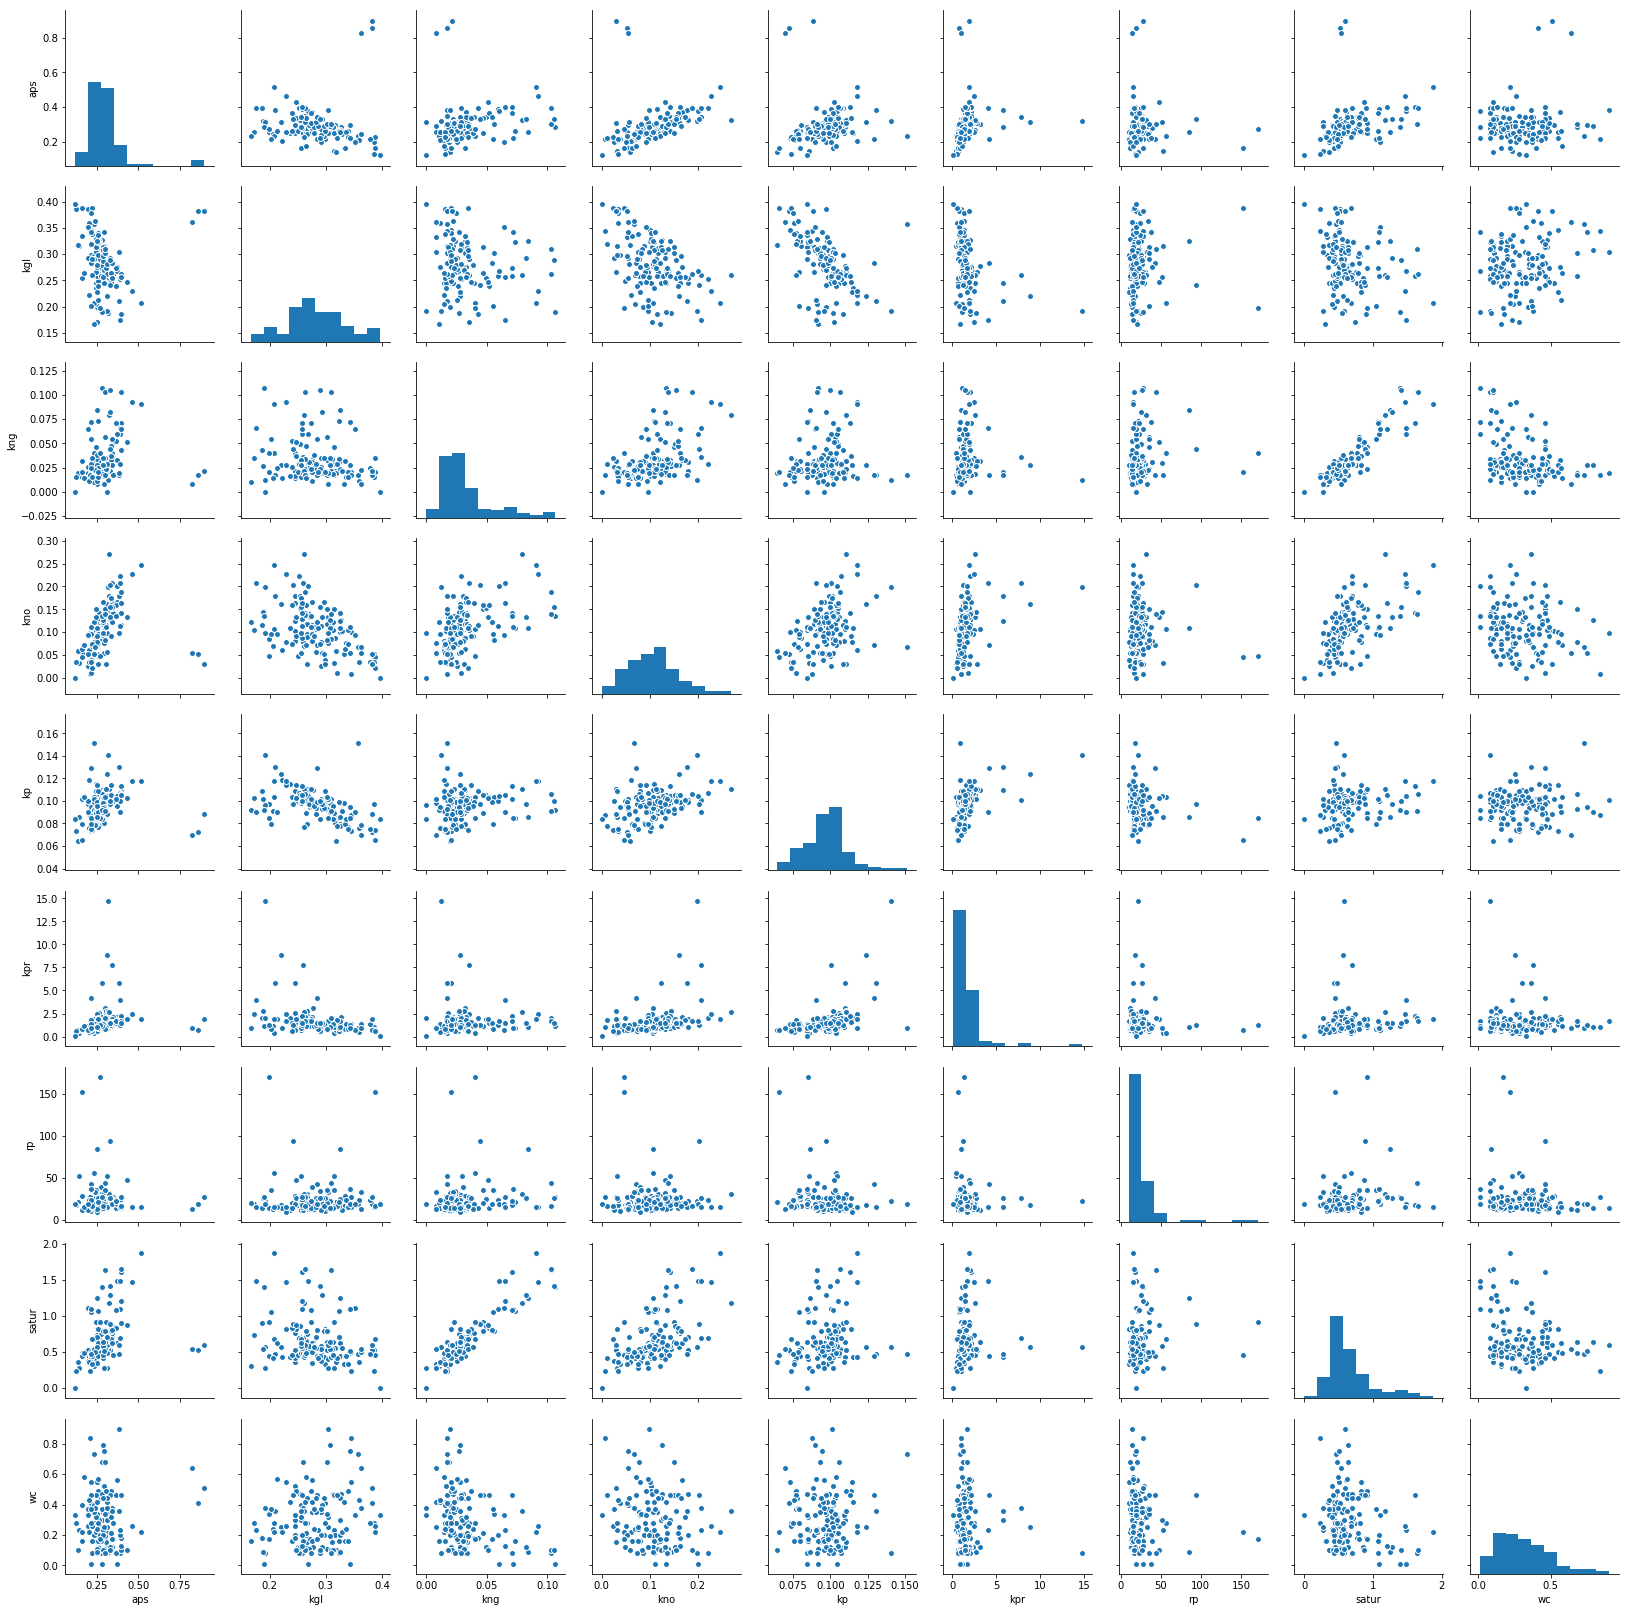

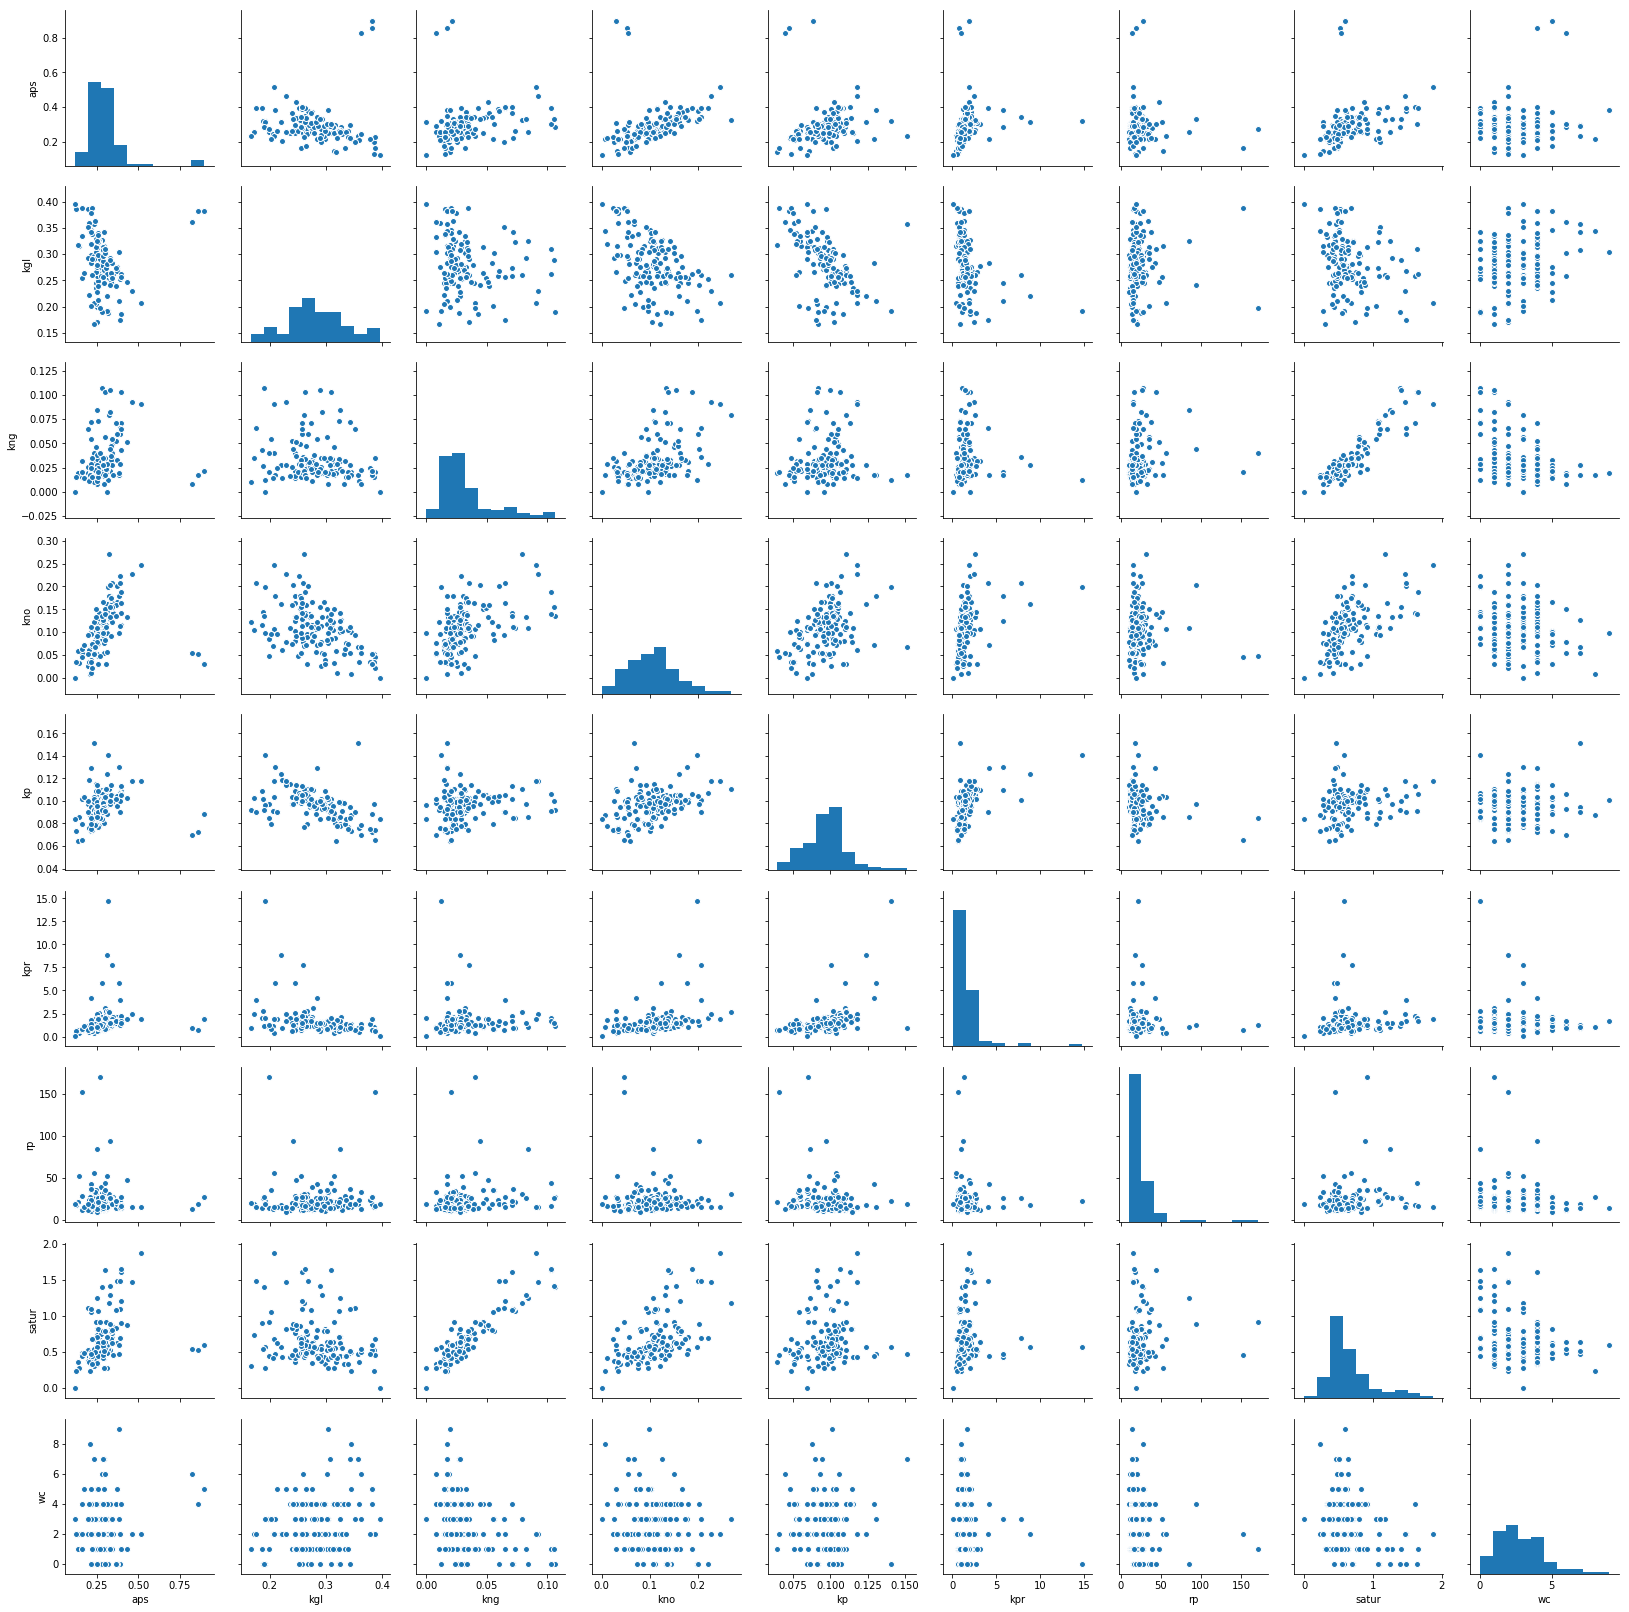

In [93]:
cols = ['aps', 'kgl', 'kng', 'kno', 'kp', 'kpr', 'rp', 'satur', 'wc']
sns_plot = sns.pairplot(data_for_analize[cols])
sns_plot.savefig(main.data_dir + '\\pairplot_original.png')
sns_plot = sns.pairplot(data_for_analize_scale[cols])
sns_plot.savefig(main.data_dir + '\\pairplot_scale.png')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000003F1F8B8CC0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000003F203F1668>]], dtype=object)

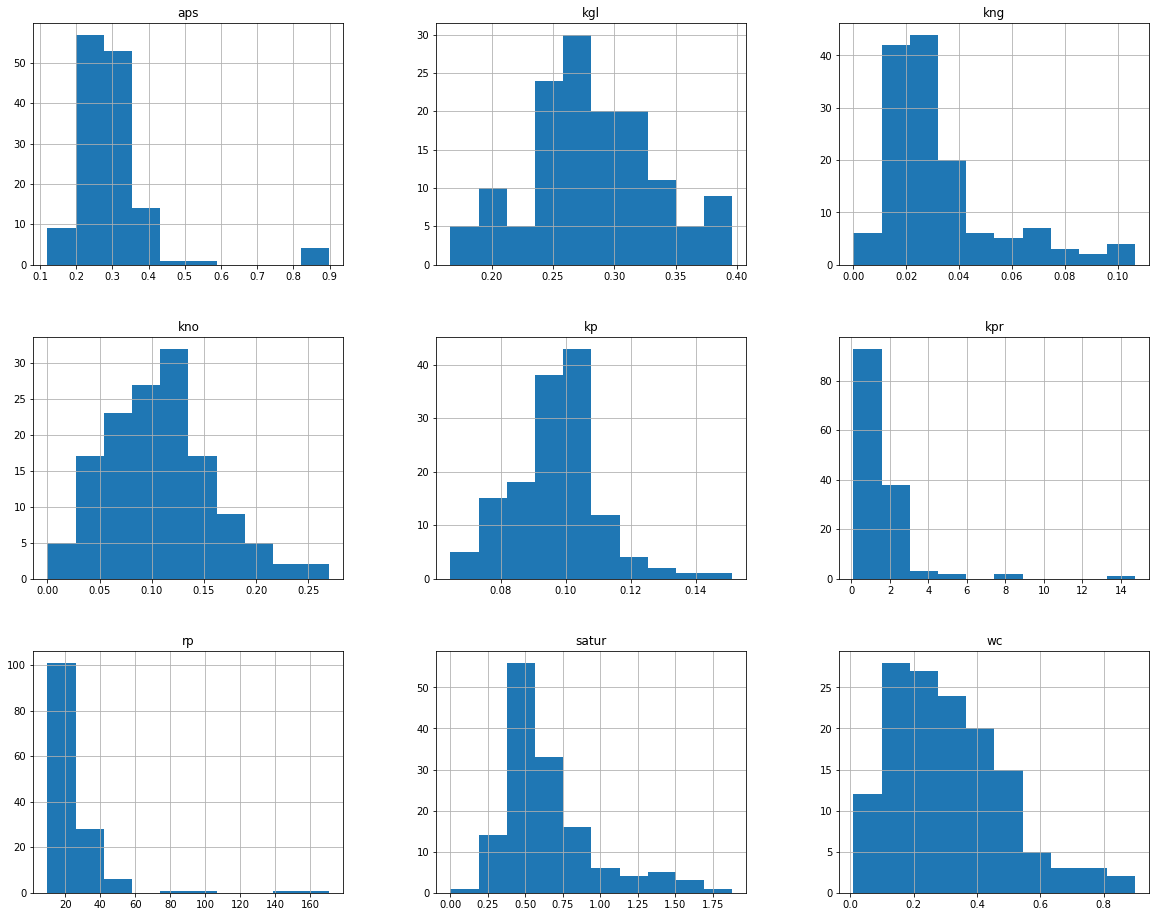

In [94]:
#fig, ax = plt.subplots()
#hist_data = data_for_analize[cols].hist(figsize=(800,800), ax=ax);
#fig.savefig(main.data_dir + '\\hist.png')
hist_data = data_for_analize[cols].hist(figsize=(20,16));
hist_data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000003F27DCD080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000003F20AC33C8>]], dtype=object)

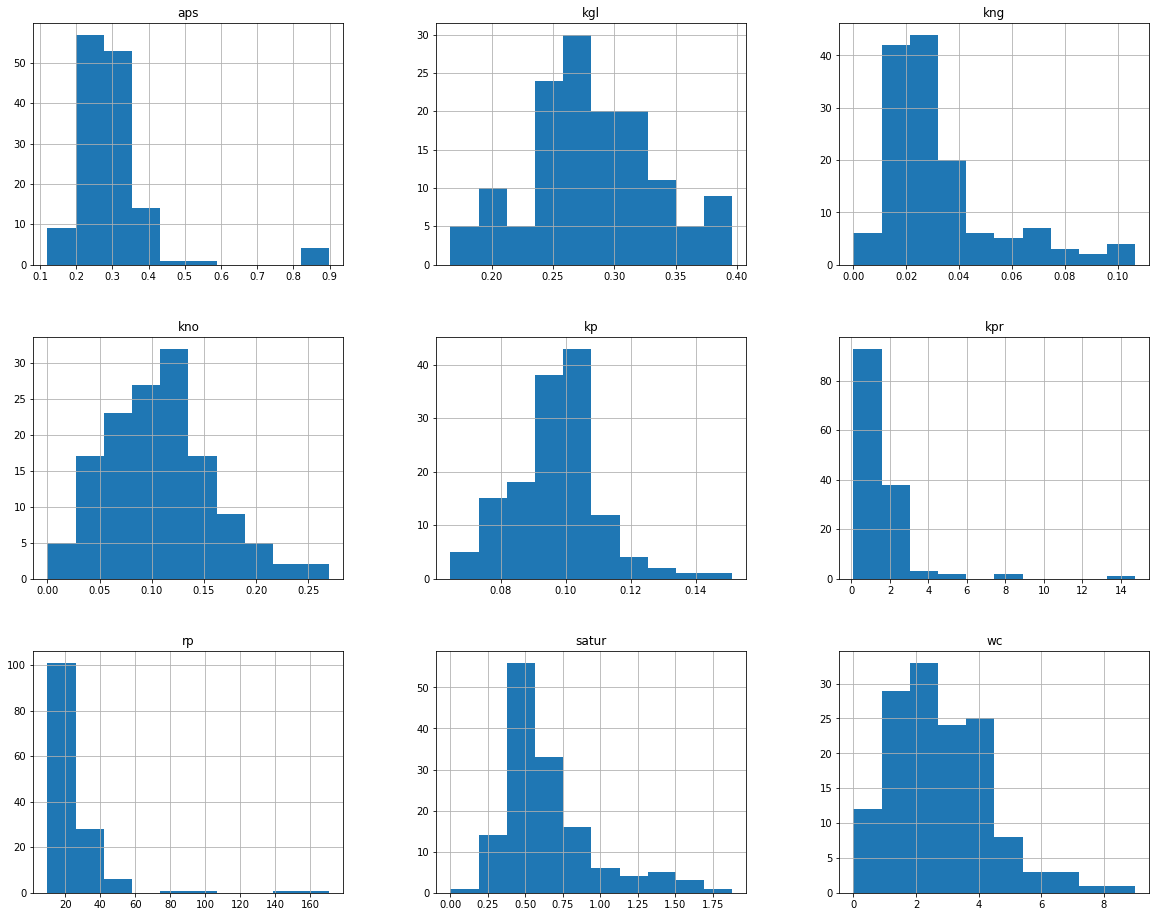

In [95]:
hist_data = data_for_analize_scale[cols].hist(figsize=(20,16));
hist_data

In [96]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [97]:
data_for_analize.columns
# преобразуем все признаки в числовые, выкинув штаты
X = data_for_analize.drop(['UWI', 'well_name', 'date_start', 'X-Coord', 'Y-Coord'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [98]:
X_scaled

array([[ 0.1817572 , -1.76847654, -0.9680828 , ..., -0.11947571,
        -0.26400341, -1.26533588],
       [-0.28354084, -0.7305989 , -0.68496678, ..., -0.19479763,
        -0.64747979, -0.25225736],
       [-0.14058991, -0.71368991, -0.56206779, ...,  0.10306369,
        -0.70410135, -0.0271288 ],
       ..., 
       [ 0.84640327, -0.47486326,  1.47303254, ...,  0.13210313,
         1.69650409, -0.98392518],
       [ 0.28993795,  0.14441186,  3.35293307, ...,  0.07574081,
         2.33672302, -1.1527716 ],
       [-1.50702306,  2.24362231, -1.52163135, ..., -0.29355124,
        -2.03461061,  0.14171762]])

In [99]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

Wall time: 1.56 s


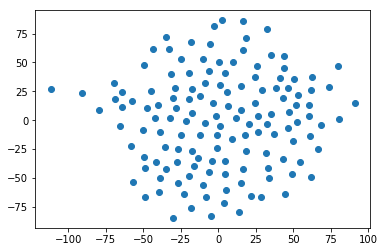

In [100]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

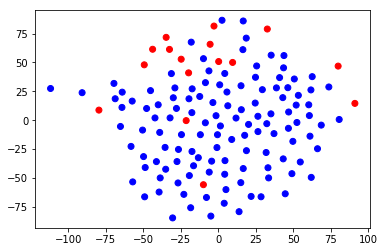

In [101]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], c=data_for_analize_scale['wc'].map({0: 'blue', 1:'blue', 2:'blue', 3:'blue', 4:'blue',
                                                                                                      5: 'red', 6:'red', 7:'red', 8:'red', 9:'red'}));

In [132]:
data_for_analize_time = data_for_analize_scale.copy()
data_for_analize_time['date_start'] =  pd.to_datetime(data_for_analize_time['date_start'])
data_for_analize_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 14 columns):
UWI           139 non-null object
aps           139 non-null float64
kgl           139 non-null float64
kng           139 non-null float64
kno           139 non-null float64
kp            139 non-null float64
kpr           139 non-null float64
rp            139 non-null float64
satur         139 non-null float64
well_name     139 non-null int64
date_start    139 non-null datetime64[ns]
wc            139 non-null int64
X-Coord       139 non-null float64
Y-Coord       139 non-null float64
dtypes: datetime64[ns](1), float64(10), int64(2), object(1)
memory usage: 15.3+ KB


In [138]:
data_for_analize_time.columns
# преобразуем все признаки в числовые
X = data_for_analize_time.drop(['UWI', 'aps', 'kgl', 'kng', 'kno', 'kp', 'kpr', 'rp', 'satur',
       'well_name', 'date_start'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X.head(1)

,wc,X-Coord,Y-Coord
0,0,351657.56,6464689.29


In [139]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

Wall time: 1.62 s
